<div >
<img src = "figs/ans_banner_1920x200.png" />
</div>

# Caso-taller:  Segmentación de Clientes con Clustering Jerárquico y DBSCAN

El objetivo de este caso-taller es analizar una base de datos ficticia sobre clientes de una tienda y buscar encontrar grupos de clientes que permitan generar estrategias de marketing focalizadas. La base se encuentra en los `Archivos de Laboratorio` en la carpeta `data` y cuenta con 200 observaciones y 5 variables:

- `Id_Cliente`: identificador de cliente.
- `Genero`: género del cliente: Mujer, Hombre
- `Edad`: edad en años
- `Ingreso`: ingresos anuales
- `Puntaje_Gasto`: es una variable que mide cuán a menudo un cliente compra en la tienda, siendo 100 el puntaje más alto.


## Instrucciones generales

1. Para desarrollar el *cuaderno* primero debe descargarlo.

2. Para responder cada inciso deberá utilizar el espacio debidamente especificado.

3. La actividad será calificada sólo si sube el *cuaderno* de jupyter notebook con extensión `.ipynb` en la actividad designada como "entrega calificada por el personal".

4. El archivo entregado debe poder ser ejecutado localmente por el tutor. Sea cuidadoso con la especificación de la ubicación de los archivos de soporte, guarde la carpeta de datos en el mismo `path` de su cuaderno, por ejemplo: `data`.

## Desarrollo


### 1.Carga de datos 

En la carpeta `data` se encuentra el archivo `datos_clientes.csv` cargue estos datos en su *cuaderno*. 

In [1]:
# Utilice este espacio para escribir el código.
import pandas as pd

nombre_archivo = "datos_clientes.csv"
df = pd.read_csv(nombre_archivo)

In [3]:
df.head()

,Id_Cliente,Genero,Edad,Ingreso,Puntaje_Gasto
0,1,Mujer,41,98115.05,39
1,2,Mujer,20,35458.14,75
2,3,Mujer,68,59872.08,55
3,4,Hombre,63,48508.93,51
4,5,Mujer,31,44431.11,54


(Utilice este espacio para describir su procedimiento)

### 2. Análisis preliminar. 

Antes de comenzar el análisis de segmentación utilice estadísticas descriptivas para explorar la variables que se encuentran en los datos. En su análisis mencione si hay patrones que surgen del examen descriptivo de los datos; entre ellos si hay diferencias en los ingresos y los puntajes de gastos para mujeres y hombres, por grupos etarios (18-24, 25-34, 35-44, 45-54, 55-64, y 65+), y por grupos etarios y género. Discuta además si estas diferencias son estadísticamente significativas.

In [4]:
# Utilice este espacio para escribir el código.
df.describe()

,Id_Cliente,Edad,Ingreso,Puntaje_Gasto
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60624.446600,50.200000
std,57.879185,13.969007,26262.903416,25.823522
min,1.000000,18.000000,13458.020000,1.000000
25%,50.750000,28.750000,41512.787500,34.750000
50%,100.500000,36.000000,60777.960000,50.000000
75%,150.250000,49.000000,77143.865000,73.000000
max,200.000000,70.000000,138584.520000,99.000000


Mujer     0.56
Hombre    0.44
Name: Genero, dtype: float64


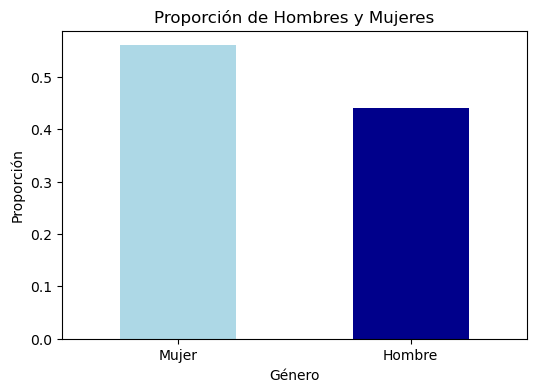

In [10]:
import pandas as pd
import matplotlib.pyplot as plt


proporcion_genero = df['Genero'].value_counts(normalize=True)

print(proporcion_genero)

plt.figure(figsize=(6, 4))
proporcion_genero.plot(kind='bar', color=['lightblue', 'darkblue'])
plt.title('Proporción de Hombres y Mujeres')
plt.xlabel('Género')
plt.ylabel('Proporción')
plt.xticks(rotation=0)
plt.show()

Genero
Hombre    62126.660455
Mujer     59444.135714
Name: Ingreso, dtype: float64


<Figure size 800x600 with 0 Axes>

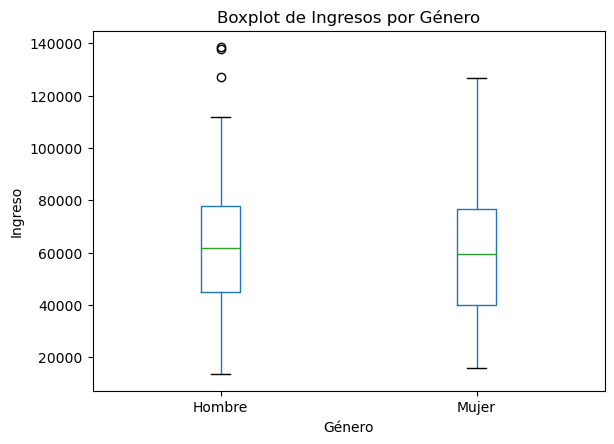

In [12]:
promedio_por_genero = df.groupby('Genero')['Ingreso'].mean()
print(promedio_por_genero)

plt.figure(figsize=(8, 6))
df.boxplot(column='Ingreso', by='Genero', grid=False)
plt.title('Boxplot de Ingresos por Género')
plt.suptitle('') 
plt.xlabel('Género')
plt.ylabel('Ingreso')
plt.show()

In [26]:
import scipy.stats as stats
ingresos_hombres = df[df['Genero'] == 'Hombre']['Ingreso']
ingresos_mujeres = df[df['Genero'] == 'Mujer']['Ingreso']

t_statistic, p_value = stats.ttest_ind(ingresos_hombres, ingresos_mujeres, equal_var=False)

print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

alpha = 0.05
if p_value < alpha:
    print("La diferencia es estadísticamente significativa.")
else:
    print("No hay evidencia suficiente para afirmar una diferencia significativa.")

T-statistic: 0.7133855872801346
P-value: 0.4765105049312679
No hay evidencia suficiente para afirmar una diferencia significativa.


Genero
Hombre    48.511364
Mujer     51.526786
Name: Puntaje_Gasto, dtype: float64


<Figure size 800x600 with 0 Axes>

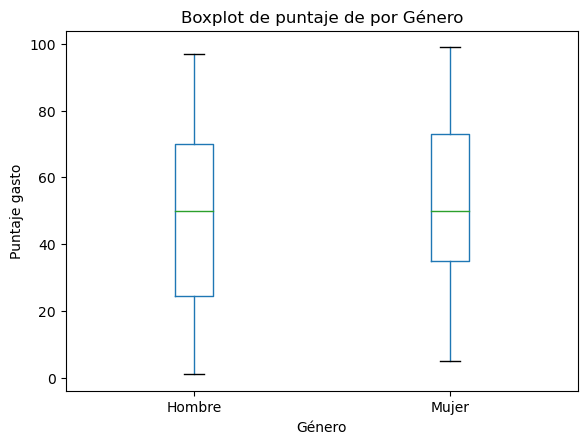

In [13]:
promedio_por_genero = df.groupby('Genero')['Puntaje_Gasto'].mean()
print(promedio_por_genero)

plt.figure(figsize=(8, 6))
df.boxplot(column='Puntaje_Gasto', by='Genero', grid=False)
plt.title('Boxplot de puntaje de por Género')
plt.suptitle('')  # Eliminar el título superior automático
plt.xlabel('Género')
plt.ylabel('Puntaje gasto')
plt.show()

In [27]:
import scipy.stats as stats
gastos_hombres = df[df['Genero'] == 'Hombre']['Puntaje_Gasto']
gastos_mujeres = df[df['Genero'] == 'Mujer']['Puntaje_Gasto']

t_statistic, p_value = stats.ttest_ind(gastos_hombres, gastos_mujeres, equal_var=False)

print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

alpha = 0.05
if p_value < alpha:
    print("La diferencia es estadísticamente significativa.")
else:
    print("No hay evidencia suficiente para afirmar una diferencia significativa.")

T-statistic: -0.8048781809684525
P-value: 0.42199772447783646
No hay evidencia suficiente para afirmar una diferencia significativa.


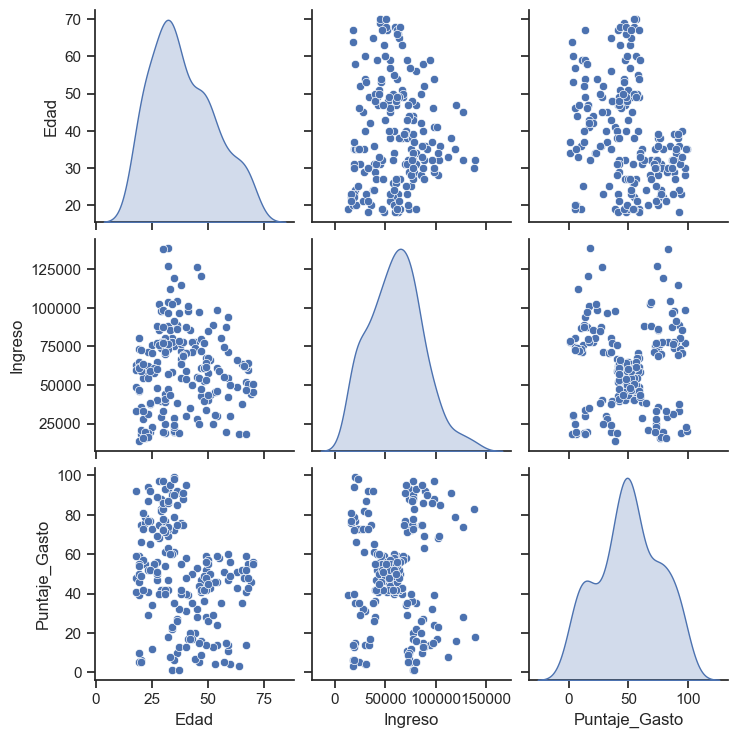

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

columnas_numericas = ['Edad', 'Ingreso', 'Puntaje_Gasto']

sns.set(style="ticks")
sns.pairplot(df[columnas_numericas], diag_kind="kde")
plt.show()

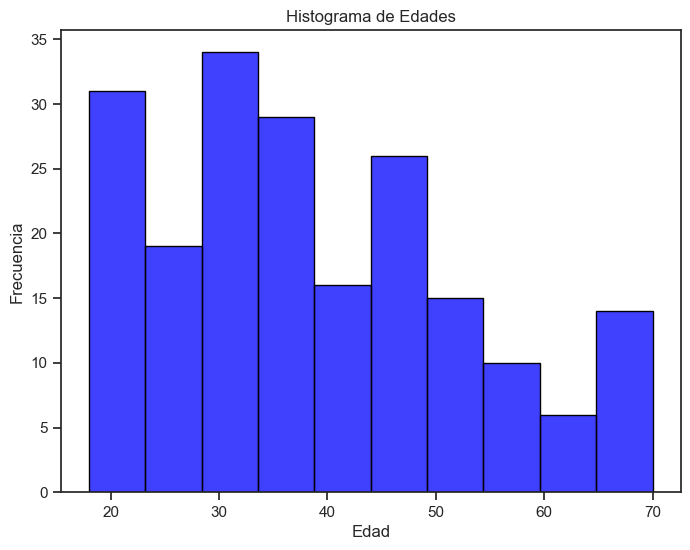

In [24]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Edad', bins=10, color='blue', edgecolor='black')
plt.title('Histograma de Edades')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

Grupo_Etario
18-24    44454.795429
25-34    71157.328148
35-44    66957.096905
45-54    58786.491026
55-64    56357.093125
65+      51420.789286
Name: Ingreso, dtype: float64


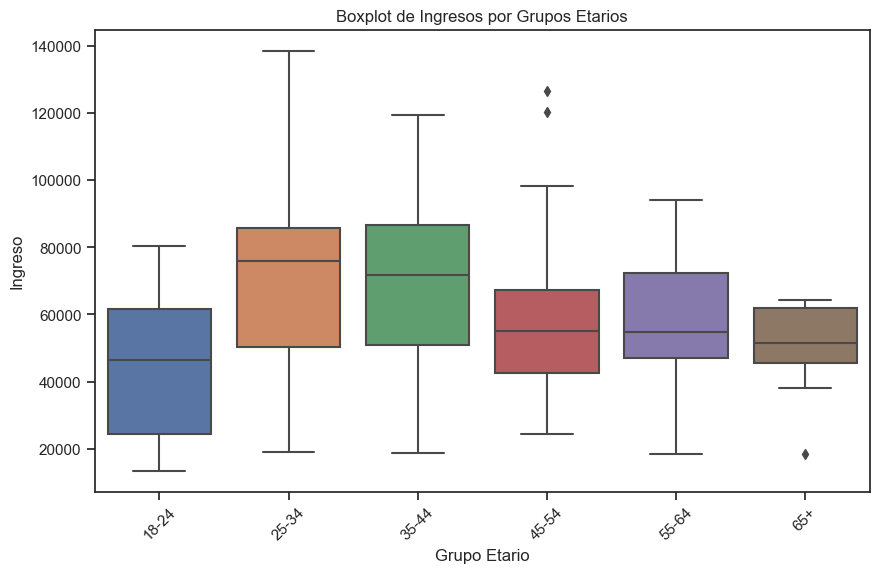

In [18]:
limites_edades = [18, 25, 35, 45, 55, 65, float('inf')]
nombres_grupos = ['18-24', '25-34', '35-44', '45-54', '55-64', '65+']


df['Grupo_Etario'] = pd.cut(df['Edad'], bins=limites_edades, labels=nombres_grupos, right=False)

promedios_por_grupo = df.groupby('Grupo_Etario')['Ingreso'].mean()

print(promedios_por_grupo)

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Grupo_Etario', y='Ingreso')
plt.title('Boxplot de Ingresos por Grupos Etarios')
plt.xlabel('Grupo Etario')
plt.ylabel('Ingreso')
plt.xticks(rotation=45)
plt.show()

In [30]:
modelo_anova = stats.f_oneway(
    df[df['Grupo_Etario'] == '18-24']['Ingreso'],
    df[df['Grupo_Etario'] == '25-34']['Ingreso'],
    df[df['Grupo_Etario'] == '35-44']['Ingreso'],
    df[df['Grupo_Etario'] == '45-54']['Ingreso'],
    df[df['Grupo_Etario'] == '55-64']['Ingreso'],
    df[df['Grupo_Etario'] == '65+']['Ingreso']
)

print(f"F-statistic: {modelo_anova.statistic}")
print(f"P-value: {modelo_anova.pvalue}")

alpha = 0.05
if modelo_anova.pvalue < alpha:
    print("La diferencia entre al menos dos grupos es estadísticamente significativa.")
else:
    print("No hay evidencia suficiente para afirmar una diferencia significativa en los grupos etarios.")

F-statistic: 6.019746307189062
P-value: 3.336261060488998e-05
La diferencia entre al menos dos grupos es estadísticamente significativa.


Grupo_Etario
18-24    56.257143
25-34    63.166667
35-44    49.428571
45-54    36.230769
55-64    32.312500
65+      46.714286
Name: Puntaje_Gasto, dtype: float64


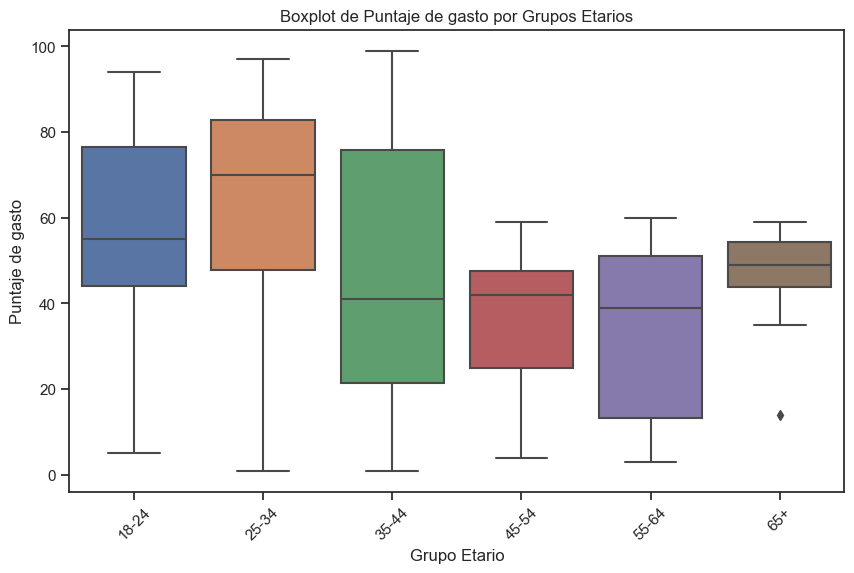

In [19]:
promedios_por_grupo = df.groupby('Grupo_Etario')['Puntaje_Gasto'].mean()

print(promedios_por_grupo)

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Grupo_Etario', y='Puntaje_Gasto')
plt.title('Boxplot de Puntaje de gasto por Grupos Etarios')
plt.xlabel('Grupo Etario')
plt.ylabel('Puntaje de gasto')
plt.xticks(rotation=45)
plt.show()

In [31]:
modelo_anova = stats.f_oneway(
    df[df['Grupo_Etario'] == '18-24']['Puntaje_Gasto'],
    df[df['Grupo_Etario'] == '25-34']['Puntaje_Gasto'],
    df[df['Grupo_Etario'] == '35-44']['Puntaje_Gasto'],
    df[df['Grupo_Etario'] == '45-54']['Puntaje_Gasto'],
    df[df['Grupo_Etario'] == '55-64']['Puntaje_Gasto'],
    df[df['Grupo_Etario'] == '65+']['Puntaje_Gasto']
)

print(f"F-statistic: {modelo_anova.statistic}")
print(f"P-value: {modelo_anova.pvalue}")

alpha = 0.05
if modelo_anova.pvalue < alpha:
    print("La diferencia entre al menos dos grupos es estadísticamente significativa.")
else:
    print("No hay evidencia suficiente para afirmar una diferencia significativa en los grupos etarios.")

F-statistic: 8.258289721310666
P-value: 4.295829973019983e-07
La diferencia entre al menos dos grupos es estadísticamente significativa.


(Utilice este espacio para describir su procedimiento)

### 3. Clustering Jerárquico

#### 3.1. Dendrogramas

Agrupe a los clientes utilizando sólo dos variables: su ingreso y el puntaje de gastos. Para ello retenga estas dos variables, estandarízelas, construya y grafique un dendograma. Para la construcción del dendrograma utilice el enlace 'ward' y la distancia euclidiana. Explique la importancia de estandarizar los datos.

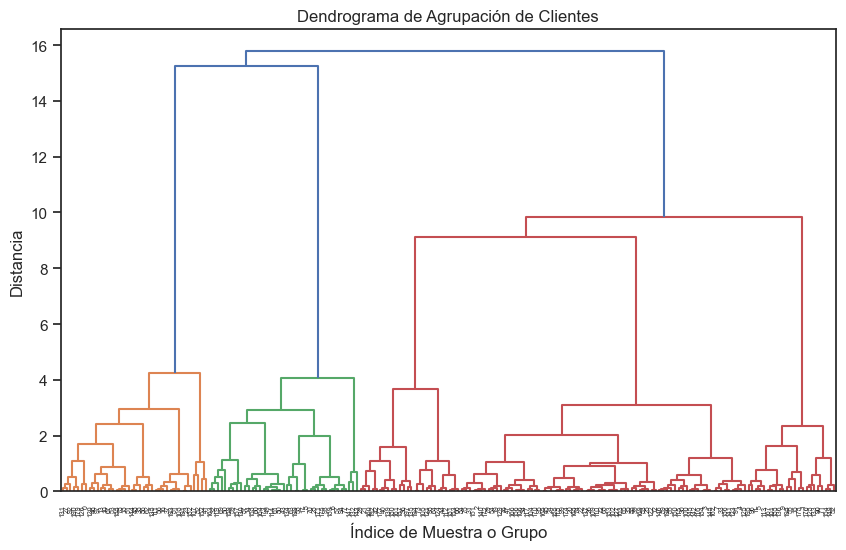

In [32]:
from scipy.cluster.hierarchy import dendrogram, linkage

variables = ['Ingreso', 'Puntaje_Gasto']
data = df[variables]


data_standardized = (data - data.mean()) / data.std()


linked = linkage(data_standardized, 'ward', 'euclidean')


plt.figure(figsize=(10, 6))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrograma de Agrupación de Clientes')
plt.xlabel('Índice de Muestra o Grupo')
plt.ylabel('Distancia')
plt.show()

(Utilice este espacio para describir su procedimiento)

#### 3.2. Número de clusters

Retenga el número de clusters que se obtengan luego de fijar la distancia en 6.

Número de clusters encontrados: 5
Cluster
1    23
2    74
3    26
4    39
5    38
dtype: int64


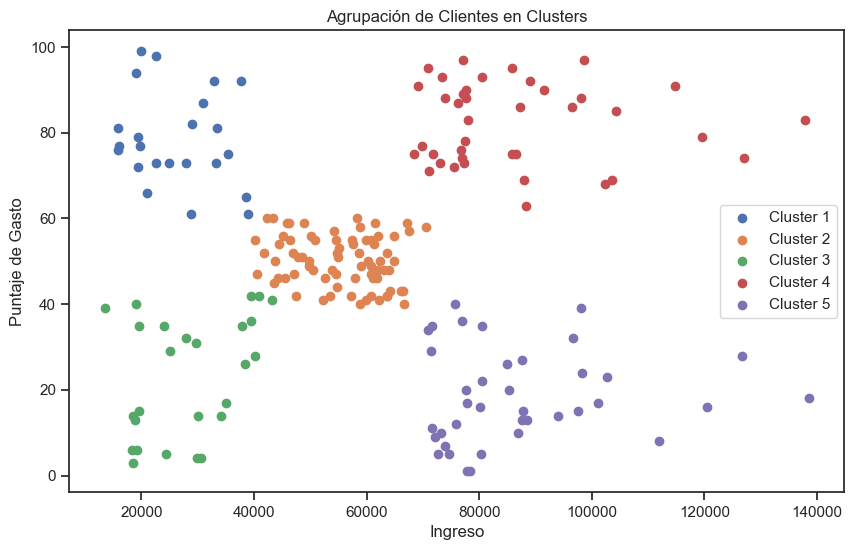

In [33]:
from scipy.cluster.hierarchy import linkage, fcluster

distancia_limite = 6
clusters = fcluster(linked, t=distancia_limite, criterion='distance')

df['Cluster'] = clusters


num_clusters = df['Cluster'].nunique()
print(f"Número de clusters encontrados: {num_clusters}")
print(df.groupby('Cluster').size())

plt.figure(figsize=(10, 6))
for cluster_num in range(1, num_clusters + 1):
    cluster_data = df[df['Cluster'] == cluster_num]
    plt.scatter(cluster_data['Ingreso'], cluster_data['Puntaje_Gasto'], label=f'Cluster {cluster_num}')

plt.title('Agrupación de Clientes en Clusters')
plt.xlabel('Ingreso')
plt.ylabel('Puntaje de Gasto')
plt.legend()
plt.show()

(Utilice este espacio para describir su procedimiento)

#### 3.3. Algoritmo Jerárquico Aglomerativo

Utilizando el número de clusters encontrados en el paso anterior, aplique el algoritmo jerárquico aglomerativo, utilizando el enlace 'ward' y la distancia euclidiana. Describa los grupos encontrados, en que grupo o grupos concentraría su estrategia de marketing y por qué?

Cluster
0    38
1    26
2    39
3    23
4    74
dtype: int64


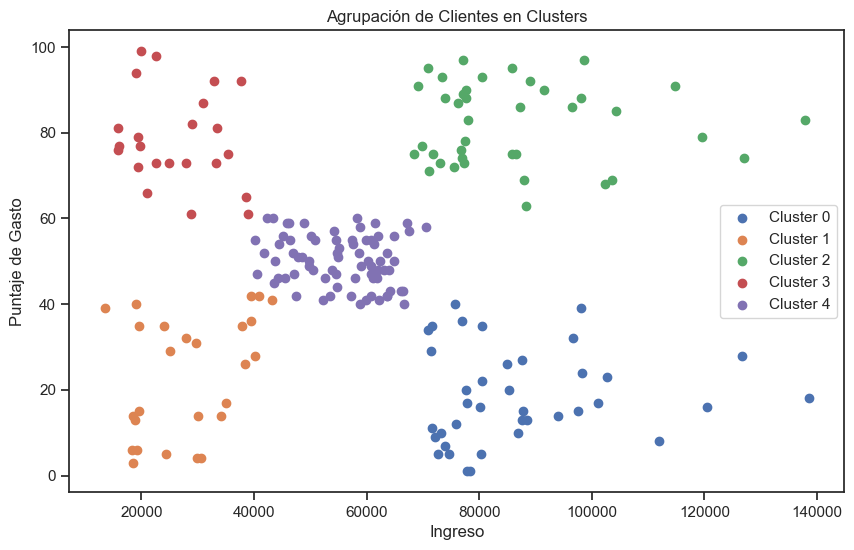

In [34]:
from sklearn.cluster import AgglomerativeClustering

num_clusters = 5

clustering = AgglomerativeClustering(n_clusters=num_clusters, affinity='euclidean', linkage='ward')
df['Cluster'] = clustering.fit_predict(data_standardized)

print(df.groupby('Cluster').size())

plt.figure(figsize=(10, 6))
for cluster_num in range(num_clusters):
    cluster_data = df[df['Cluster'] == cluster_num]
    plt.scatter(cluster_data['Ingreso'], cluster_data['Puntaje_Gasto'], label=f'Cluster {cluster_num}')

plt.title('Agrupación de Clientes en Clusters')
plt.xlabel('Ingreso')
plt.ylabel('Puntaje de Gasto')
plt.legend()
plt.show()

In [41]:
variables = ['Edad', 'Ingreso', 'Puntaje_Gasto', 'Cluster']
data = df[variables]

cluster_stats = data.groupby('Cluster').describe()

cluster_stats.round(2).T

Cluster                      0         1          2         3         4
Edad          count      38.00     26.00      39.00     23.00     74.00
              mean       40.39     44.12      32.69     25.52     43.59
              std        11.38     13.09       3.73      5.27     16.79
              min        19.00     19.00      27.00     18.00     18.00
              25%        34.00     35.00      30.00     21.50     27.00
              50%        41.50     45.50      32.00     24.00     47.50
              75%        47.00     52.75      35.50     30.00     56.50
              max        59.00     67.00      40.00     35.00     70.00
Ingreso       count      38.00     26.00      39.00     23.00     74.00
              mean    87055.07  28274.67   86537.50  26230.42  55451.26
              std     16200.10   8998.50   16684.18   7742.41   7847.57
              min     70888.72  13458.02   68486.79  15766.84  40218.68
              25%     75765.51  19362.52   75875.52  19590.81  48594.11
              50%     80570.39  28787.94   77996.30  24905.79  57359.50
              75%     95988.57  37203.28   93952.44  33157.71  61796.64
              max    138584.52  43155.28  137838.57  38950.66  70469.66
Puntaje_Gasto count      38.00     26.00      39.00     23.00     74.00
              mean       18.63     23.31      82.13     78.57     50.22
              std        10.92     13.96       9.36     10.95      5.87
              min         1.00      3.00      63.00     61.00     40.00
              25%        10.25     13.25      74.50     73.00     46.00
              50%        16.50     27.00      83.00     77.00     50.00
              75%        26.75     35.00      90.00     84.50     55.00
              max        40.00     42.00      97.00     99.00     60.00

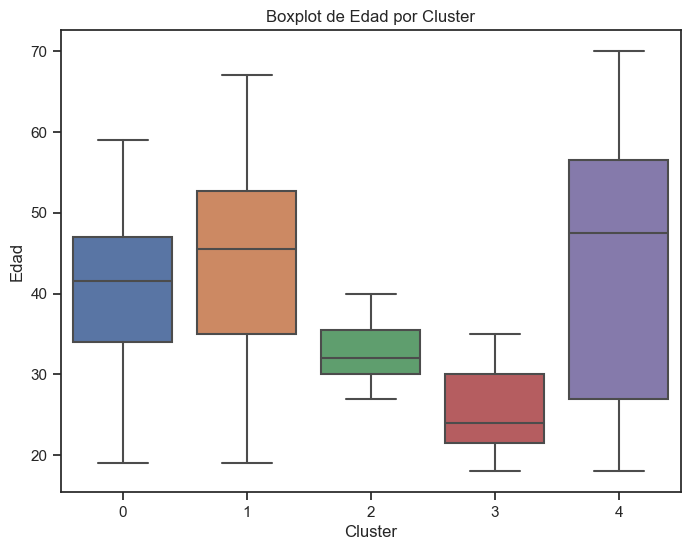

In [42]:
variables = ['Edad', 'Cluster']
data = df[variables]

plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='Cluster', y='Edad')
plt.title('Boxplot de Edad por Cluster')
plt.xlabel('Cluster')
plt.ylabel('Edad')
plt.show()

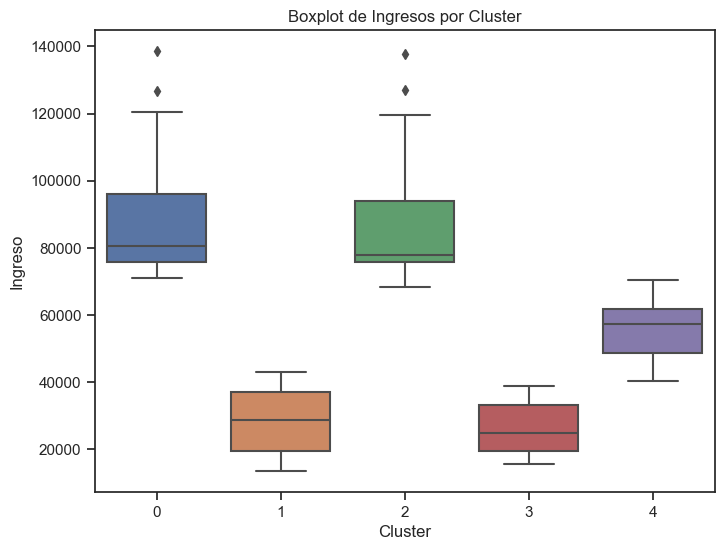

In [44]:
variables = ['Ingreso', 'Cluster']
data = df[variables]

plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='Cluster', y='Ingreso')
plt.title('Boxplot de Ingresos por Cluster')
plt.xlabel('Cluster')
plt.ylabel('Ingreso')
plt.show()

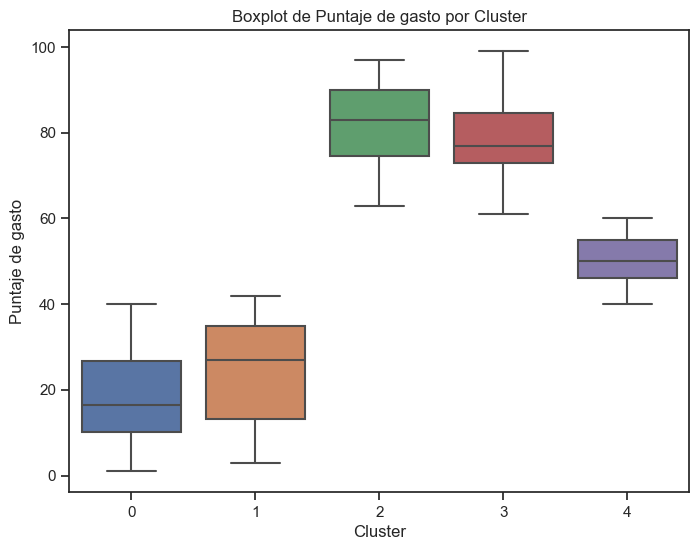

In [46]:
variables = ['Puntaje_Gasto', 'Cluster']
data = df[variables]

plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='Cluster', y='Puntaje_Gasto')
plt.title('Boxplot de Puntaje de gasto por Cluster')
plt.xlabel('Cluster')
plt.ylabel('Puntaje de gasto')
plt.show()

Genero     Hombre     Mujer
Cluster                    
0        0.526316  0.473684
1        0.384615  0.615385
2        0.461538  0.538462
3        0.391304  0.608696
4        0.418919  0.581081


<Figure size 1000x600 with 0 Axes>

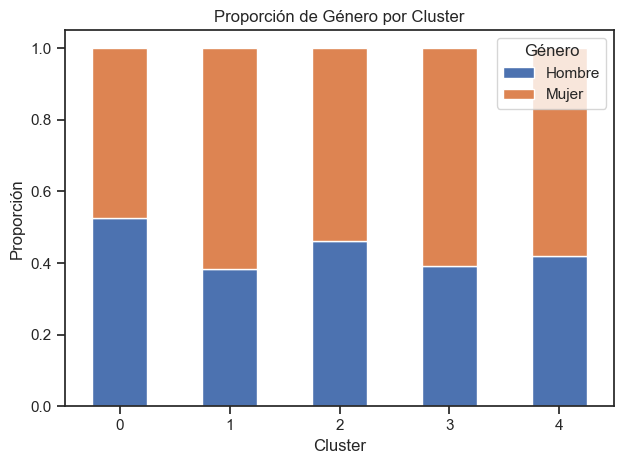

In [52]:
variables = ['Genero', 'Cluster']
data = df[variables]

proporcion_genero_por_cluster = data.groupby(['Cluster', 'Genero']).size().unstack()
proporcion_genero_por_cluster = proporcion_genero_por_cluster.div(proporcion_genero_por_cluster.sum(axis=1), axis=0)

print(proporcion_genero_por_cluster)

plt.figure(figsize=(10, 6))
proporcion_genero_por_cluster.plot(kind='bar', stacked=True)
plt.title('Proporción de Género por Cluster')
plt.xlabel('Cluster')
plt.ylabel('Proporción')
plt.xticks(rotation=0)
plt.legend(title='Género')
plt.tight_layout()
plt.show()

In [50]:
df.head()

,Id_Cliente,Genero,Edad,Ingreso,Puntaje_Gasto,Grupo_Etario,Cluster
0,1,Mujer,41,98115.05,39,35-44,0
1,2,Mujer,20,35458.14,75,18-24,3
2,3,Mujer,68,59872.08,55,65+,4
3,4,Hombre,63,48508.93,51,55-64,4
4,5,Mujer,31,44431.11,54,25-34,4


(Utilice este espacio para describir su procedimiento)

### 4. DBSCAN

Implemente DBSCAN, al igual que el punto anterior sólo dos variables: su ingreso y el puntaje de gastos. Al implementar  justifique su elección de `min_samples` y `eps`. ¿Cuántos grupos o clusters encuentra? ¿Cuáles son su características? ¿Cambiaría su estrategia de marketing respecto al punto anterior? Justifique su respuesta.

(Utilice este espacio para describir su procedimiento)

### 5. Incorporando más dimensiones

Hasta este momento hemos utilizado solo dos variables para nuestro análisis, sin embargo, la base cuenta con otras variables más: género y edad. Usando las categorías de edad creadas anteriormente incorpore género y grupo etario a su análisis. Genere los grupos utilizando DBSCAN y la distancia de Gower, justificando su elección de `min_samples` y `eps`   ¿Incorporar estas variables, ayuda a la focalización de la estrategia de marketing?

In [7]:
# Utilice este espacio para escribir el código.

(Utilice este espacio para describir su procedimiento)